# Machine Learning Introduction

## Naive Bayes Classifiers

Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem. This means that you'll often compare your more complicated model's metrics to those of a Naive Bayes classifier to tell how good your model is.

**Baseline**: A model used as a reference point for comparing how well another model (typically, a more complex one) is performing. For a particular problem, the baseline helps model developers quantify the minimal expected performance that a new model must achieve for the new model to be useful.

### Bayes Theorem

<img src="img/bayes.jpg" style="width: 600px;" align="left"/>

### Multinomial Naive Bayes Example

Multinomial Naive Bayes is when you assume features come from a simple multinomial distribution, which is a distribution that describes the probability of observing counts among a number of categories. This is basically a binomial distribution, except with several potential outcomes. This can be useful when you have features that have to do with counts.

(An example of a multinomial distrubtion with only 2 variables.)
<img src="img/trinomial.png" style="width: 700px;" align="left"/>

#### Classifying Text with Multinomial Naive Bayes: Intuition

If you're trying to classify text, features are often associated with word counts or frequencies. Thus, it makes sense to use a multinomial naive Bayes classifier as a baseline. Let's take a look at scikit-learn's Newsgroups dataset, which has a bunch of emails and their topics/categories.

#### Training the Model

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
# Let's just look at four categories
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
# This dataset is already split into train/test
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [4]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



#### Vectorization

This is feature engineering for text. Basically, you want to turn your text into some kind of vector. ```TF-IDF``` stands for ```term frequency-inverse document frequency```, which means that instead of having a vector of just raw word counts, it'll weight individual word "counts" both by how many times that word appears in a certain document, and by how many times it appears in other documents.

This means that frequently appearing words like "the" will not necessarily have a high TD-IDF count because they appear frequently in all documents. The highest weighted words will be those that appear frequently in only a few documents.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# We make a Multinomial Naive Bayes model using a TD-IDF vectorizer
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [6]:
# train the model, passing in the text (train.data) 
# and the labels (train.target)
model.fit(train.data, train.target)
labels = model.predict(test.data)

#### Evaluating the Model

In [7]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test.target, labels))

Accuracy: 0.8016759776536313


![title](img/classified.png)

80% accuracy! So this means that we would like more complex, tailored models to do better. We can see that the Naive Bayes classifier did pretty well on classifying topics that had little overlap with others (like comp.graphics), but less well on topics that had overlap (soc.religion.christian and talk.religion.misc). 

#### Using the Model

In [8]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [9]:
predict_category('what is the screen resolution of my laptop')

'comp.graphics'

In [10]:
predict_category('catchy christian music')

'soc.religion.christian'

## Linear Regressions

Linear regressions, like Naive Bayes, are a good starting point for when you want to do some sort of regression task. We are trying to fit a dataset to a line, while minimizing error (squared sum of residuals between observed and predicted data).

### Brief Review of Gradient Descent

Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient.

Here's what it looks like: 

<img src="img/gradient-descent.jpg" style="width: 500px;" align="left"/>

In practice, gradient descent is used more often for things like computing the weights of neurons in neural nets, not for linear regressions. Therefore, it is more useful for us to cover gradient descent in depth in our neural networks lecture later this semester.

Scikit-learn's ```LinearRegression()``` model, for example, does not use gradient descent to update the coefficients. It uses ordinary least squares solver from ```scipy```.

### Linear Regression Example: Bicycle Traffic 

As an example, let's take a look at whether we can predict the number of bicycle trips across Seattle's Fremont Bridge based on weather, season, and other factors. I've gathered some data for you. The FremontBridge data is from [the Seattle Local Government's API](https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD) and the weather data is collected [daily from a station near the Seattle-Tacoma Airport](http://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND).

#### Reading in the Data

In [11]:
import pandas as pd

# read in the data
counts = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('data/weather.csv', index_col='DATE', parse_dates=True)

#### Exploring the Data

In [12]:
weather.head()

,STATION,NAME,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,...,WT03,WT04,WT05,WT08,WT09,WT13,WT14,WT16,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2013-01-01,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",6.04,NaN,0.00,0.0,0.0,NaN,41,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",7.16,NaN,0.00,0.0,0.0,NaN,43,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",6.71,NaN,0.16,0.0,0.0,NaN,44,29,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
2013-01-04,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",6.26,NaN,0.10,0.0,0.0,NaN,50,36,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
2013-01-05,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",6.93,NaN,0.12,0.0,0.0,NaN,44,40,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN


In [13]:
weather.shape

(2502, 26)

In [14]:
# number of bicycles crossing on either side of Fremont Bridge
counts.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2015-02-24 02:00:00,3.0,3.0
2019-01-01 00:00:00,0.0,9.0
2019-01-01 01:00:00,2.0,22.0
2016-02-15 00:00:00,3.0,3.0
2019-01-01 02:00:00,1.0,11.0


In [15]:
counts.shape

(62040, 2)

#### Cleaning the Data

Here, we want to convert hourly counts into daily counts pandas resample() let's you do this. 'd' means daily. other potential frequencies can be 'w': weekly, 'm': monthly, or 'q': quarterly. Notice that this is for time series data, so your dataframe needs a datetime-like index.

In [18]:
# convert bicycle counts from daily to monthly.
daily = counts.resample('d').sum()
daily.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03,1760.0,1761.0
2012-10-04,1708.0,1767.0
2012-10-05,1558.0,1590.0
2012-10-06,1080.0,926.0
2012-10-07,1191.0,951.0


In [19]:
# sum east and west counts
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns
daily.head()

,Total
Date,
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0
2012-10-07,2142.0


In [20]:
# Create dummy variable for each day of the week
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Adding New Features

Since holidays/hours of daylight might also have an effect on bicycle traffic (what effect?), let's add those to our ```daily``` dataframe.

In [21]:
#holidays from 2012 to 2019
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2019')
holidays[0:10]

DatetimeIndex(['2012-01-02', '2012-01-16', '2012-02-20', '2012-05-28',
               '2012-07-04', '2012-09-03', '2012-10-08', '2012-11-12',
               '2012-11-22', '2012-12-25'],
              dtype='datetime64[ns]', freq=None)

In [22]:
holiday_ser = pd.Series(1, index=holidays, name='holiday')
holiday_ser.head()

2012-01-02    1
2012-01-16    1
2012-02-20    1
2012-05-28    1
2012-07-04    1
Name: holiday, dtype: int64

In [23]:
daily = daily.join(holiday_ser)

In [24]:
daily.loc['20130101':'20130105']

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2013-01-01,678.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-01-02,1835.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
2013-01-03,1803.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2013-01-04,1712.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2013-01-05,719.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN


In [26]:
daily['holiday'].fillna(0, inplace=True)
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
# function to calculate hours of daylight for a certain date
# pulled from online -- dw too much about it!
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

(8, 17)

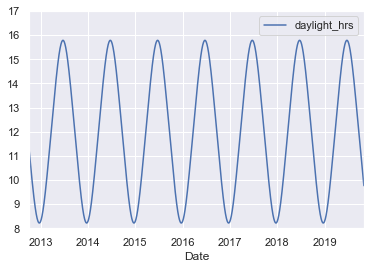

In [28]:
daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

In [29]:
# temperatures are in tenths of a deg C, so we divide by 10 to convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

# add precipitation, temp, and dry day to daily dataframe
daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

In [30]:
# add a counter that sees how many years have passed since the first day
# this will let us keep track of any changes across years
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [31]:
#finaldataframe
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,NaN,NaN,NaN,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,NaN,NaN,NaN,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,NaN,NaN,NaN,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,NaN,NaN,NaN,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,NaN,NaN,NaN,0.010959


#### Training the Model

In [32]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

# Dropped 'Sun' to avoid collinearity, and 'Total' because that's the dependent variable
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']

X = daily[column_names]
y = daily['Total']

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
daily['predicted'] = model.predict(X)

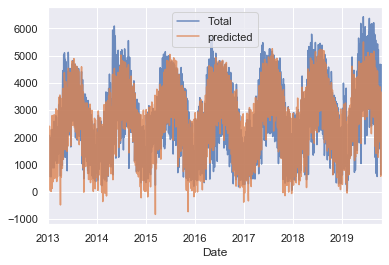

In [36]:
# plot predicted bicycle traffic vs. actual bicycle traffic
daily[['Total', 'predicted']].plot(alpha=0.8);

In [37]:
# get coefficients
# how would you interpret these?
params = pd.Series(model.coef_, index=X.columns)
params

Mon               1870.053283
Tue               2011.174047
Wed               1977.719152
Thu               1847.643264
Fri               1502.125621
Sat                104.234248
holiday          -1284.464856
daylight_hrs       106.992248
PRCP           -186248.314976
dry day            514.989921
Temp (C)           441.216714
annual              77.464485
dtype: float64

## Final Thoughts

1. Training and implementing models will become second nature. Thinking about the right type of model and the right features to use is a combination of intuition, talent, and lots of practice.
2. Simple models do not necessarily mean bad results. Additionally, you can use them a baseline for other, more complicated models.